# *`Mini Project 3 – Twitter Sentimental Analysis Using NLP and Python`*

**Scenario:**

By analyzing text data, we can find meaningful insights from non-numeric data that can help us achieve our objective. With the help of NLP and its concepts, we can do it. Twitter is one of the biggest platforms that people use to write their messages, express their feelings about a particular topic, and share knowledge in the form of text. By analyzing text data, we can make good decisions for different use cases like judging the sentiment of the human tweets, and any product review/comments can tell us the performance of a product in the market.

NLP allows us to study and understand the colinearity of the data. So we can predict our objective.

**Objective:**

Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, NLTK to extract and analyze the information, Sklearn for model building and performance visualization, to predict our different categories of people’s mindsets.

**Dataset description:** The data contain information about many Tweets in the form of text and their types, as mentioned below.

* **Tweets:** Data is in the form of a sentence written by individuals.
* **category:**
  1. Numeric (0: Neutral, -1: Negative, 1: Positive) (It is our dependent variable)

In [1]:
# Make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The following tasks are to be performed:
* Read the Data from the Given excel file.
* Change our dependent variable to categorical. ( 0 to “Neutral,” -1 to “Negative”, 1 to “Positive”)
* Do Missing value analysis and drop all null/missing values
* Do text cleaning. (remove every symbol except alphanumeric, transform all words to lower case, and remove punctuation and stopwords )
* Create a new column and find the length of each sentence (how many words they contain)
* Split data into dependent(X) and independent(y) dataframe
* Do operations on text data

> Hints:
* Do one-hot encoding for each sentence (use TensorFlow)
* Add padding from the front side (use Tensorflow)
* Build an LSTM model and compile it (describe features, input length, vocabulary size, information drop-out layer, activation function for output, )
* Do dummy variable creation for the dependent variable
* split the data into tests and train

* Train new model
* Normalize the prediction as same as the original data(prediction might be in decimal, so whoever is nearest to 1 is predicted as yes and set other as 0)
* Measure performance metrics and accuracy
* print Classification report

## Get the data

In [2]:
!wget https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/Mini_Project_3_Twitter_Sentiment_Analysis/Dataset/Twitter_Data.csv

--2024-03-17 13:59:32--  https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/Mini_Project_3_Twitter_Sentiment_Analysis/Dataset/Twitter_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20895533 (20M) [text/plain]
Saving to: ‘Twitter_Data.csv.1’

Twitter_Data.csv.1  100%[===================>]  19.93M  --.-KB/s    in 0.1s    

2024-03-17 13:59:32 (134 MB/s) - ‘Twitter_Data.csv.1’ saved [20895533/20895533]



In [3]:
# Read the data into pandas dataframe
twitter_data = pd.read_csv('Twitter_Data.csv')
twitter_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
# Change our dependent variable to categorical. ( 0 to “Neutral,” -1 to “Negative”, 1 to “Positive”)
category_mapping = {0: "Neutral", -1: "Negative", 1: "Positive"}

# Use the map function to map numerical values to categories
twitter_data['category'] = twitter_data['category'].map(category_mapping)

twitter_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


## Visualize some random sentences

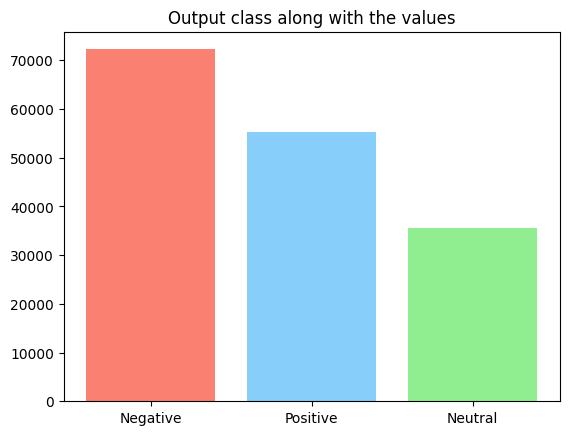

In [5]:
# Inspect the output column and check how many values are present for each class
plt.bar(['Negative', 'Positive', 'Neutral'], twitter_data['category'].value_counts(), color = ['salmon', 'lightskyblue', 'lightgreen'])
plt.title('Output class along with the values')
plt.show()

In [6]:
# Print a random sentence and its assigned class
print('\nSample sentences along with labels:\n')
for i in range(5):
  random_index = np.random.randint(0, twitter_data.shape[0])
  text = twitter_data['clean_text'][random_index]
  label = twitter_data['category'][random_index]
  print(f'\nText {i + 1}:\n{text}\n\nLabel {i + 1}: {label}\n')


Sample sentences along with labels:


Text 1:
you know who drank water and liked dogs hitler keep that mind those you that drink water and post pictures your dog

Label 1: Positive


Text 2:
allllll

Label 2: Neutral


Text 3:
with the prime minister narendra modi mera vote bjp 

Label 3: Neutral


Text 4:
congress had balls take tough decisions modi has the courage 

Label 4: Negative


Text 5:
hope you have the answer ’ like how shashi tharoor told that congress should given credit for modi becoming 

Label 5: Positive



In [7]:
# Perform Missing value analysis and drop all null/missing values
twitter_data.isna().sum()
twitter_data.dropna(inplace=True)
twitter_data.shape

(162969, 2)

## Prepare the data/ Preprocessing the data

In [8]:
# Do text cleaning. (remove every symbol except alphanumeric, transform all words to lower case, and remove punctuation and stopwords )
def clean_text(text):

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stopwords_list]

    # Join the tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

# Example sentence to check how our function works
sample_text = "Hello! This is an example text with symbols, punctuation, and stopwords."
cleaned_text = clean_text(sample_text)
print("Original text:", sample_text)
print("\nCleaned text:", cleaned_text)

Original text: Hello! This is an example text with symbols, punctuation, and stopwords.

Cleaned text: Hello example text symbols punctuation stopwords


In [9]:
# Lets remove the punctuations and stopwords from our data as well
twitter_data['clean_text'] = twitter_data['clean_text'].apply(clean_text)

In [10]:
# Create a new column and find the length of each sentence (how many words they contain)
twitter_data['sentence_length'] = twitter_data['clean_text'].apply(lambda x: len(x.split()))
twitter_data.head()

,clean_text,category,sentence_length
0,modi promised “ minimum government maximum gov...,Negative,23
1,talk nonsense continue drama vote modi,Neutral,6
2,say vote modi welcome bjp told rahul main camp...,Positive,13
3,asking supporters prefix chowkidar names modi ...,Positive,19
4,answer among powerful world leader today trump...,Positive,10


In [11]:
# Split data into dependent(X) and independent(y) dataframe
X = twitter_data.drop('category', axis = 1)
y = twitter_data['category']

# Do operations on text data
Hints:

* Do one-hot encoding for each sentence (use TensorFlow)
* Add padding from the front side (use Tensorflow)
* Build an LSTM model and compile it (describe features, input length vocabulary size, information drop-out layer, activation function for output, )
* Do dummy variable creation for the dependent variable
* split the data into tests and train

In [12]:
# Function to create batches of data
def create_batches(data, batch_size):
  num_batches = len(data) // batch_size
  if len(data) % batch_size != 0:
      num_batches += 1
  batches = []
  for i in range(num_batches):
      start_index = i * batch_size
      end_index = min((i + 1) * batch_size, len(data))
      batch_data = data[start_index:end_index]
      batches.append(batch_data)
  return batches

In [1]:
# Create a tokenizer object
tokenizer = Tokenizer()

# Initialize an empty DataFrame to store the encoded data
encoded_data_frames = []

# Process the data in batches
batch_size = 500
batches = create_batches(twitter_data['clean_text'], batch_size)

# Fit the tokenizer on the text data of the current batch
tokenizer.fit_on_texts(twitter_data['clean_text'])

for batch in batches:

  # Convert each sentence in the batch to a sequence of integers
  sequences = tokenizer.texts_to_sequences(batch)

  # Perform one-hot encoding for the current batch
  one_hot_results = tokenizer.sequences_to_matrix(sequences, mode='binary')

  # Create a DataFrame from the one-hot encoded results of the current batch
  one_hot_df = pd.DataFrame(one_hot_results)

  # Append the encoded DataFrame of the current batch to the list
  encoded_data_frames.append(one_hot_df)

NameError: name 'Tokenizer' is not defined

,0,1,2,3,4,5,6,7,8,9,...,109174,109175,109176,109177,109178,109179,109180,109181,109182,109183
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Concatenate all the encoded DataFrames along the row axis
twitter_data_encoded = pd.concat(encoded_data_frames, axis=0)

In [ ]:
# Reset the index of the encoded DataFrame
twitter_data_encoded.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
twitter_data_encoded = pd.concat([twitter_data, twitter_data_encoded], axis=1)

# Display the resulting DataFrame
twitter_data_encoded